# (12104) Chesley orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '12104'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = 0.0
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)

In [4]:
add_gaia_obs = True
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias = False
debias_lowres = True
deweight = True
eliminate = False
max_obs_per_night = 4
verbose = True
obs_array_optical, observer_codes_optical = fit.get_mpc_optical_obs_array(body_id, optical_obs_file, t_min_tdb, t_max_tdb, debias, debias_lowres, deweight, eliminate, max_obs_per_night, verbose)
obs_array_radar, observer_codes_radar = fit.get_radar_obs_array(body_id, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    obs_array_gaia, observer_codes_gaia = fit.get_gaia_optical_obs_array(body_id, de_kernel_path, t_min_tdb=None, t_max_tdb=None, verbose=True)
    obs_array_optical = np.vstack((obs_array_optical, obs_array_gaia))
    observer_codes_optical = observer_codes_optical + observer_codes_gaia

Skipped 28 observations 
	 28 of which were non-geocentric occultations or space-based observations, 
	 0 were either roving or radar observations (radar is handled separately), 
	 0 of which were outside the specified time range.
No debiasing needed for 1822 observations. Debiased 1273 observations. No biasing information for 10 observations.
Applied default weight of 1 arcsec to 153 CCD observations
Deweighted 800 observations as part of deweighting scheme.
Found 257 observations from Gaia DR3.
	 Added 32 of those observations.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, init_cov, obs_array_optical, observer_codes_optical, obs_array_radar, observer_codes_radar, n_iter_max=n_iter_max, de_kernel=de_kernel, de_kernel_path=de_kernel_path, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.428			 0.489			 1432.037			 0.228
2			 0.428			 0.488			 1432.963			 0.229
3			 0.428			 0.488			 1432.963			 0.229
Converged without rejecting outliers. Starting outlier rejection now.
4			 0.400			 0.439			 1161.247			 0.186
5			 0.401			 0.437			 1160.939			 0.186
6			 0.401			 0.436			 1161.766			 0.187
Converged after rejecting outliers.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 6 (of 6):
RMS unweighted: 0.40099509980334347
RMS weighted: 0.4363657491423879
chi-squared: 1161.7658760301156
reduced chi-squared: 0.18653915800098195
square root of reduced chi-squared: 0.4319017920789192
t: MJD 57747.0 TDB
Fitted Variable		Initial Value			Uncertainty			Fitted Value 			Uncertainty			Change				Change (sigma)
e			2.41663381933e-02		1.04627140790e-08 		2.41663674972e-02		1.11760413358e-08 		+2.93039215740e-08		+2.801
q			2.93823893665e+00		3.56230095612e-08 		2.93823884959e+00		3.74104229984e-08 		-8.70631433614e-08		-2.444
tp			5.68199298246e+04		1.13863320389e-04 		5.68199301875e+04		1.19306950201e-04 		+3.62934399163e-04		+3.187
om			7.80621900600e+01		3.59365037852e-07 		7.80621897608e+01		3.58533465557e-07 		-2.99214136135e-07		-0.833
w			1.82993622616e+02		2.04141793706e-05 		1.82993688194e+02		2.13330507873e-05 		+6.55776685790e-05		+3.212
i			1.11516133707e+01		2.06158828465e-07 		1.11516136983e+01		2.0599409813

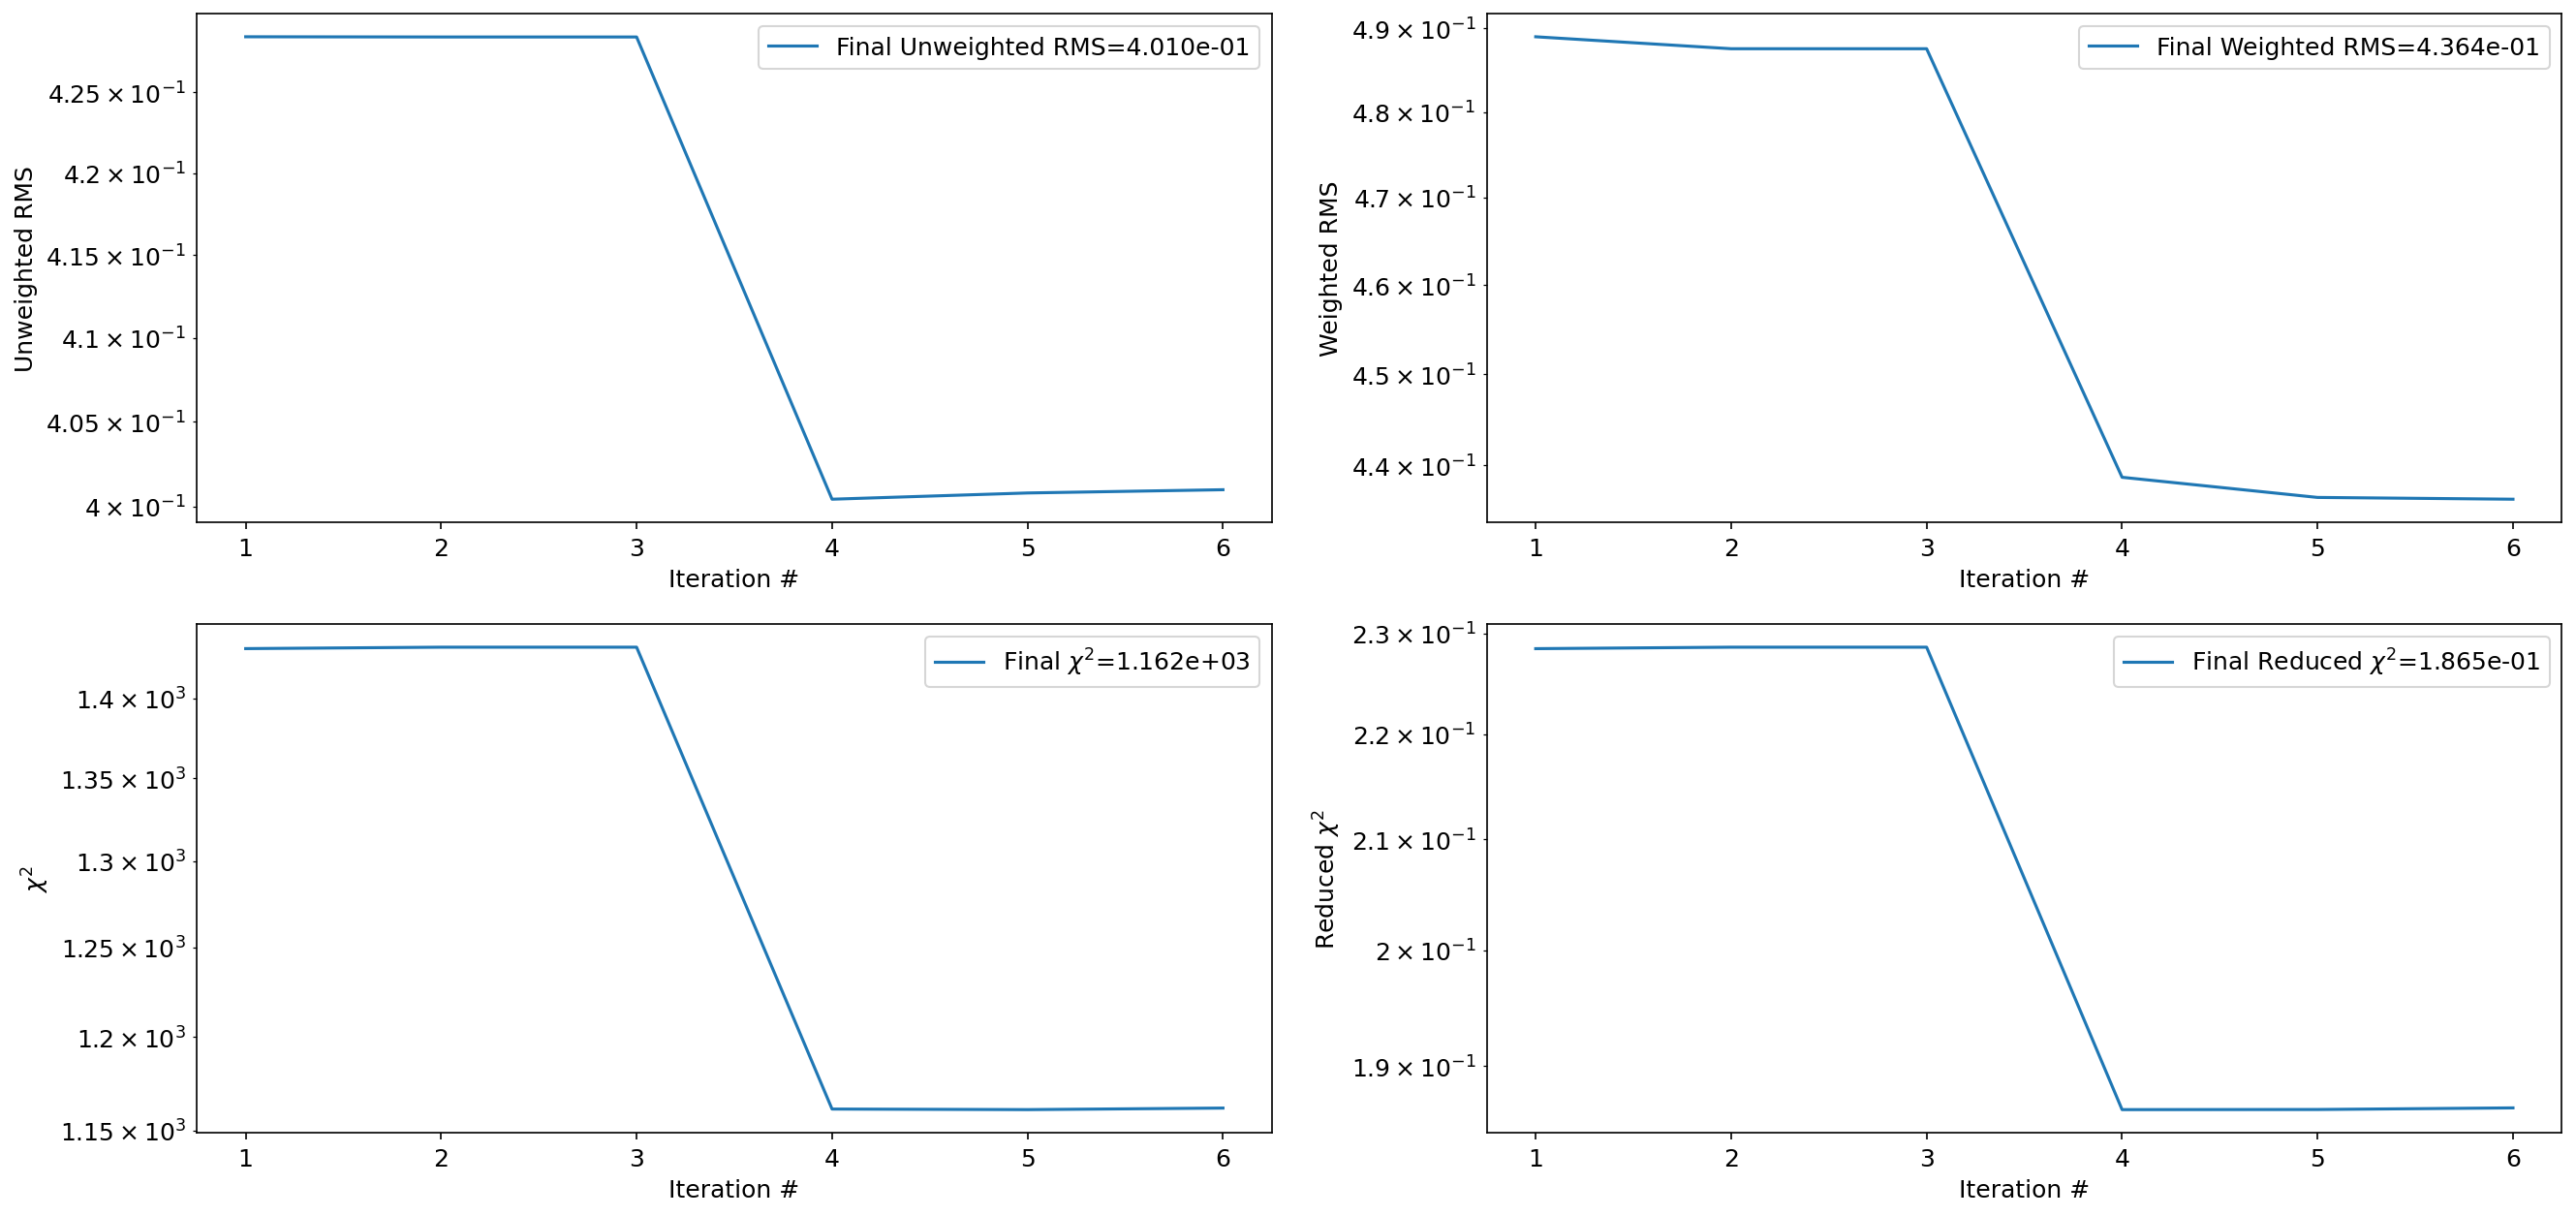

In [8]:
fit_sim.plot_summary(auto_close=True)

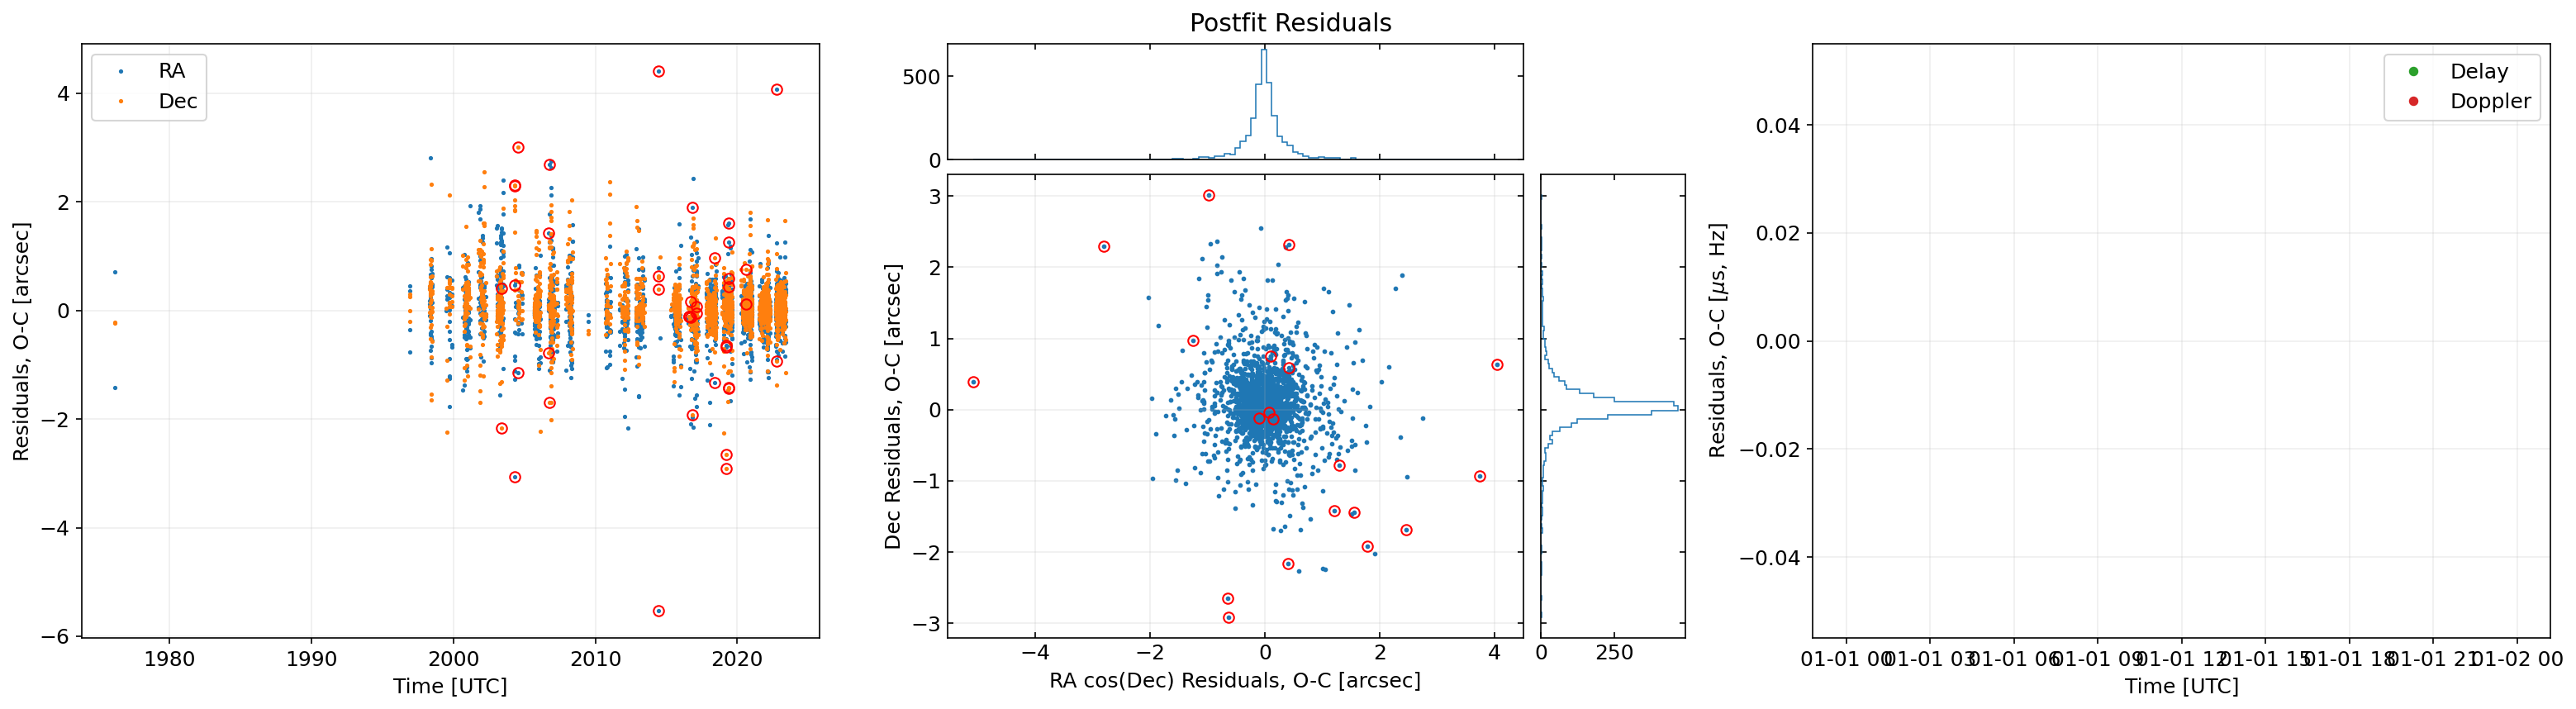

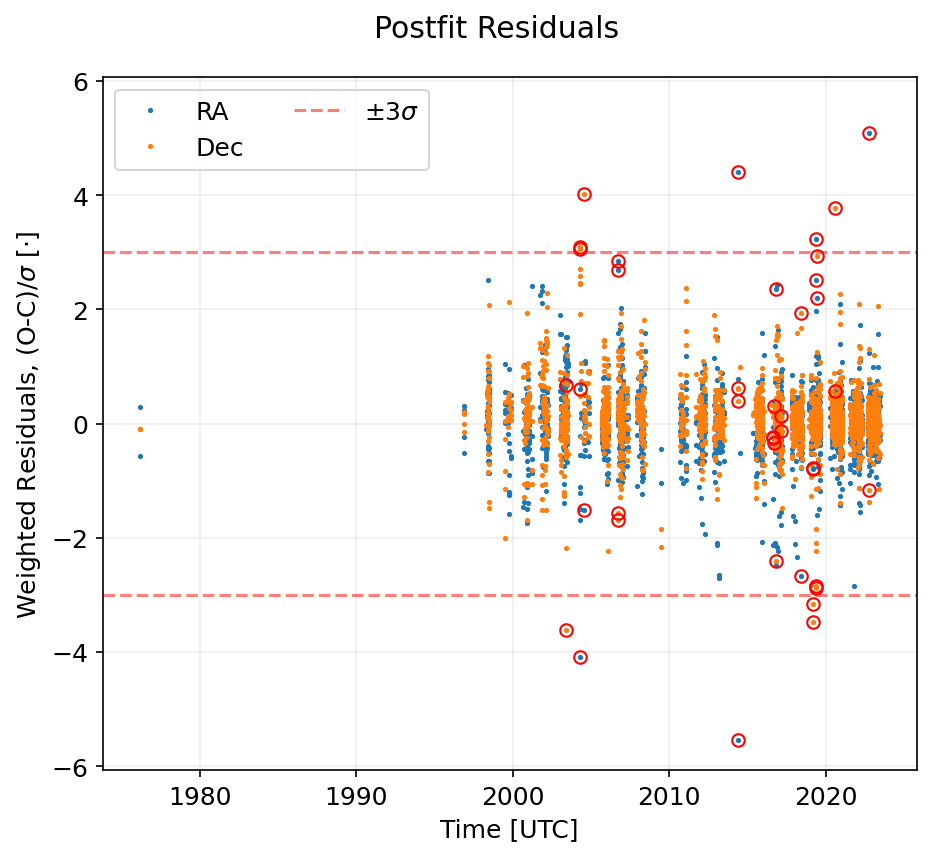

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 4.22
Mahalonobis distance between GRSS and JPL solution: 3.89
Bhattacharya distance between JPL and GRSS solution: 0.0222
Bhattacharya coefficient between JPL and GRSS solution: 0.9780


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90